# Dataset & Prerequisites

Data that we use in this class is from PalmerPenguins Dataset. This dataset has been recently introduced as an alternative to the famous Iris dataset. It is created by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER. You can obtain this dataset here https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data. This dataset is essentially composed of two datasets, each containing data of 344 penguins. Just like in Iris dataset there are 3 different species of penguins coming from 3 islands in the Palmer Archipelago.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
# from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


    DELETE ALL ROWS WITH MISSING VALUES


                data.dropna()

    IMPUTATION - REPLACE MISSING VALUES WITH SOMETHING ELSE 

                fillna()

                column_1 = column_1.fillna(strategy)
                column_2 = column_2.fillna(strategy)


    strategy

    numerical= mean/median
    categorical = mode/introduce a new category(constant)

# 1. Imputation

* Data that we get from clients can come in all shapes and forms.
* Often it is sparse, meaning some samples may miss data for some features
*  we may apply different strategies for replacing those missing values. For example, we may fill these empty slots with average feature value, or maximal feature value

 let’s first detect missing data. For that we can use Pandas:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### 1.1 Drop samples with missing values

The easiest deal with missing values is to drop samples with missing values from the dataset, 

In [4]:
data = data.dropna()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### 1.2 Imputation

The other way is to use imputation, meaning to replace missing values. To do so we can pick some value, or use the mean value of the feature, or an average value of the feature, 

So, here is the proper way. We detected missing data in numerical features culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g. For the imputation value of these features, we will use the mean value of the feature. For the categorical feature ‘sex‘, we use the most frequent value. Here is how we do i

In [9]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
data['culmen_length_mm'] = data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()))
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].median()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)


In [11]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [12]:
data['sex'].value_counts().index[0]

'MALE'

In [13]:
# data = pd.read_csv('./data/penguins_size.csv')


data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

# data.reset_index()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE


In [14]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
data['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

Often, data is not missing, but it has an invalid value. For example, we know that for the ‘sex‘ feature we can have two values: FEMALE and MALE. We can check if we have values other than this:

In [20]:
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


As it turnes out we have one record that has value ‘.’ for this feature, which is not correct. We can observe these instances as a missing data and drop them or replace them:

    WAYS TO DROP VALUES
        data.dropna(inplace=True)
        data.drop([row_index], inplace=True)
        data.drop([column_name],axis=1, inplace=True)

In [21]:
data = data.drop([336])
# data.reset_index()

In [22]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


# 2. Categorical Encoding

    Encoding
    
    categorical -> numerical 
    gender= female, male

    label_encoding  
        convert categories to numbers in alphabetical order
            female - 0
            male - 1

        Pandas process
            convert datatype to category -> column.cat.codes


    one-hot_encoding -
        converts the categories into individual columns (0,1) - POPULAR
            gender= female, male
            gender_female gender_male

        Pandas process: 
            PD.GET_DUMMIES()


        COUNTRIES = 25

* One way to improve your predictions is by applying clever ways when working with categorical variables
* These variables, as the name suggests, have discrete values and represent some sort of category or class. For example color can be categorical variable (‘red’, ‘blue‘, ‘green‘). The challenge is including these variables into data analysis and use them with machine learning algorithms. Some machine learning algorithms support categorical variables without further manipulation, but some don’t. That is why we use a categorical encoding. In this tutorial, we cover several types of categorical encoding, 

let’s extract those variables from our dataset into a separate variable and mark them as categorical type:

In [23]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [24]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], axis=1)
categorical_data.head()


,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


Ok, now we are ready to roll. We start with the simplest form of encoding Label Encoding.

### 2.1 Label Encoding

Label encoding is converting each categorical value into some number. For example, the ‘species‘ feature contains 3 categories. We can assign value 0 to Adelie, 1 to Gentoo and 2 to Chinstrap. 

In [25]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


In [26]:
categorical_data["species_cat"].value_counts()

0    152
2    123
1     68
Name: species_cat, dtype: int64

In [27]:
categorical_data["species"].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

, we added three new features each containing encoded categorical features. From the first five instances, we can see that species category Adelie is encoded with value 0, island category Torgensesn is encoded with value 2 and sex categories FEMALE and MALE are encoded with values 0 and 1 respectively.

### 2.2 One-Hot Encoding

It spreads the values in a feature to multiple flag features and assigns values 0 or 1 to them. This binary value represents the relationship between non-encoded and encoded features.

we have two possible values in ‘sex‘ feature: FEMALE and MALE. This technique will create two separate features labeled let’s say ‘sex_female‘ and ‘sex_male‘. If in the ‘sex‘ feature we have value ‘FEMALE‘ for some sample, the ‘sex_female‘ will be assigned value 1 and ‘sex_male‘ will be assigned value 0. In the same way, if in the ‘sex‘ feature we have the value ‘MALE‘ for some sample, the ‘sex_male‘ will be assigned value 1 and ‘sex_female‘ will be assigned value 0.

In [28]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,2,1,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,MALE,0,2,1,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0


As you we gave some new columns there. Essentially, every category in each feature got a separate column. Often, just one-hot encoded values are used as input to a machine learning algorithm.

### 2.3 Count Encoding

Count encoding is converting each categorical value to its frequency, ie. the number of times it appears in the dataset. For example, if the ‘species‘ feature contains 6 occurrences of class Adelie we will replace every Adelie value with the number 6. Here is how we do that in the code:

In [29]:
categorical_data['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [32]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'], axis=1)

species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

categorical_data.head()

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc
0,Adelie,Torgersen,MALE,152,52,178
1,Adelie,Torgersen,FEMALE,152,52,165
2,Adelie,Torgersen,FEMALE,152,52,165
3,Adelie,Torgersen,MALE,152,52,178
4,Adelie,Torgersen,FEMALE,152,52,165


### 2.4 Target Encoding

It replaces a categorical value with the average value of the output (ie. target) for that value of the feature. Essentially, all you need to do is calculate the average output for all the rows with specific category value. Now, this is quite straight forward when the output value is numerical. If the output is categorical, like in our PalmerPenguins dataset, we need to apply some of the previous techniques to it.

Often this average value is blended with the outcome probability over the entire dataset in order to reduce the variance of values with few occurrences.  It is important to note that since category values are calculated based on the output value, these calculations should be done on the training dataset and then applied to other datasets. Otherwise, we would face information leakage, meaning that we would include information about the output values from the test set inside of the training set. This would render our tests invalid or give us false confidence. Ok, let’s see how we can do this in code:

read more : https://medium.datadriveninvestor.com/improve-your-classification-models-using-mean-target-encoding-a3d573df31e8

In [33]:
categorical_data["species"] = categorical_data["species"].cat.codes

island_means = categorical_data.groupby('island')['species'].mean()
sex_means = categorical_data.groupby('sex')['species'].mean()

In [34]:
# Target 
categorical_data["species"] 

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 343, dtype: int8

Here we used label encoding for output feature and then calculated mean values for categorical features ‘island‘ and ‘sex‘. Here is what we get for the ‘island‘ feature:

In [35]:
island_means

island
Biscoe       1.473054
Dream        0.548387
Torgersen    0.000000
Name: species, dtype: float64

This means that values Biscoe, Dream and Torgersen will be replaced with values 1.473054, 0.548387 and 0 respectively. For the ‘sex‘ feature we have a similar situation:

In [36]:
sex_means

sex
FEMALE    0.909091
MALE      0.921348
Name: species, dtype: float64

Meaning that values FEMALE and MALE will be replaced with 0.909091 and 0.921348 respectively. Here is what that looks like in the dataset:

In [37]:
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc,island_target_enc,sex_target_enc
0,0,Torgersen,MALE,152,52,178,0.000000,0.921348
1,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
2,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
3,0,Torgersen,MALE,152,52,178,0.000000,0.921348
4,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
...,...,...,...,...,...,...,...,...
339,2,Biscoe,MALE,123,167,178,1.473054,0.921348
340,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091
341,2,Biscoe,MALE,123,167,178,1.473054,0.921348
342,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091


In [38]:
categorical_data['island_target_enc']

C:\Users\JOY\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
339    1.473054
340    1.473054
341    1.473054
342    1.473054
343    1.473054
Name: island_target_enc, Length: 343, dtype: category
Categories (3, float64): [1.473054, 0.548387, 0.000000]

### 2.5 Leave One Out Target Encoding

Leave-one-out encoding (LOO or LOOE) is an example of target-based encoding—it prevents target data leakage, unlike other target-based methods.

The final type of encoding that we explore in this class is built on top of Target Encoding. It works in the same way as Target encoding with one difference. When we are calculating the mean output value for the sample, we exclude that sample. Here is how it is done in the code. First, we define a function that does this:

In [39]:
def leave_one_out_mean(series):
    series = (series.sum() - series)/(len(series) - 1)
    return series

In [40]:
# And then we apply it to categorical values in our dataset:
categorical_data['island_loo_enc'] = categorical_data.groupby('island')['species'].apply(leave_one_out_mean)
categorical_data['sex_loo_enc'] = categorical_data.groupby('sex')['species'].apply(leave_one_out_mean)
categorical_data.head()

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc,island_target_enc,sex_target_enc,island_loo_enc,sex_loo_enc
0,0,Torgersen,MALE,152,52,178,0.0,0.921348,0.0,0.926554
1,0,Torgersen,FEMALE,152,52,165,0.0,0.909091,0.0,0.914634
2,0,Torgersen,FEMALE,152,52,165,0.0,0.909091,0.0,0.914634
3,0,Torgersen,MALE,152,52,178,0.0,0.921348,0.0,0.926554
4,0,Torgersen,FEMALE,152,52,165,0.0,0.909091,0.0,0.914634


More about Category Encoders  https://contrib.scikit-learn.org/category_encoders/index.html

# 3. Handling Outliers

* Outliers are values that are deviating from the whole distribution of the data. 
* Sometimes these values are mistakes and wrong measurements and should be removed from datasets,
* Sometimes they are valuable edge-case information.
* This means that sometimes we want to leave these values in the dataset, since they may carry some important information, while other times we want to remove those samples, because of the wrong information.

In [ ]:
PERCENTILES - quantiles
STATISTICAL RESULTS

In [ ]:
PERCENTILES - quantiles
0 -> 0.05, 0.1
100 -> 0.98, 0.95

* we can use the Inter-quartile range to detect these points. Inter-quartile range or IQR indicates where 50 percent of data is located.
* When we are looking for this value we first look for the median, since it splits data into half. 
* Then we are locating the median of the lower end of the data (denoted as Q1) and the median of the higher end of the data (denoted as Q3).
* Data between Q1 and Q3 is the IQR. 
* Outliers are defined as samples that fall below Q1 – 1.5(IQR) or above Q3 + 1.5(IQR). 


We can do this using a boxplot. The purpose of the boxplot is to visualize the distribution. In essence, it includes important points: max value, min value, median, and two IQR points (Q1, Q3). 

In [41]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.920244,17.156268,200.868310,4199.791571
std,5.451506,1.970368,14.014098,799.950869
min,32.100000,13.100000,172.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

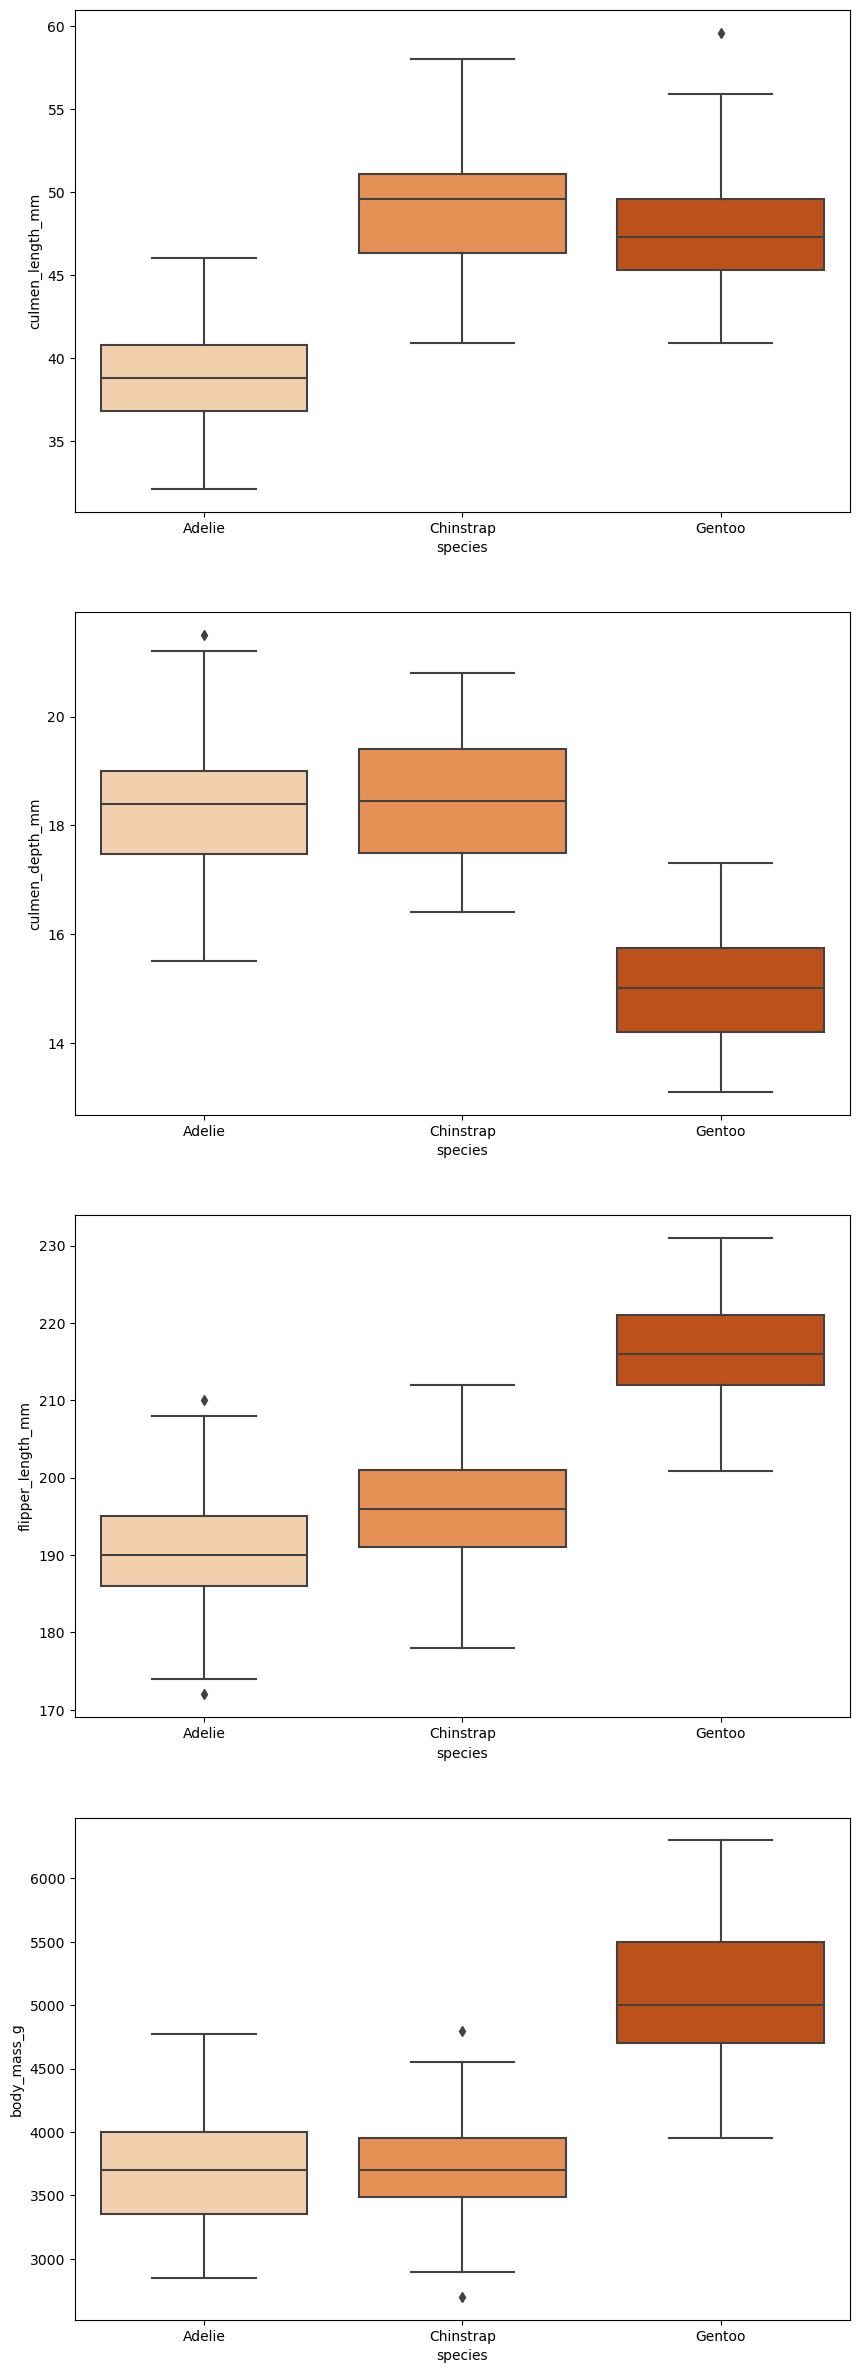

In [42]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

### 3.1 standard deviation

The other way for detecting and removing outliers would by using standard deviation( measure of the amount of variation or dispersion of a set of values. )

In [43]:
factor = 2
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


In [44]:
data.shape

(343, 7)

Note that now we have only 100 samples left after this operation. Here we need to define the factor by which we multiply the standard deviation. Usually, we use values between 2 and 4 for this purpose.

### 3.2 Percentiles

Finally, we can use a method to detect outliers is to use percentiles. 

We can assume a certain percentage of the value from the top or the bottom as an outlier. Again a value for the percentiles we use as outliers border depends on the distribution of the data. Here is what we can do on PalmerPenguins dataset:

In [45]:
upper_lim = data['culmen_length_mm'].quantile(.96)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


In [46]:
data.shape

(343, 7)

In [47]:
no_outliers["culmen_length_mm"].describe()

count    309.000000
mean      44.039624
std        4.708954
min       35.900000
25%       39.700000
50%       44.500000
75%       48.200000
max       52.100000
Name: culmen_length_mm, dtype: float64

<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

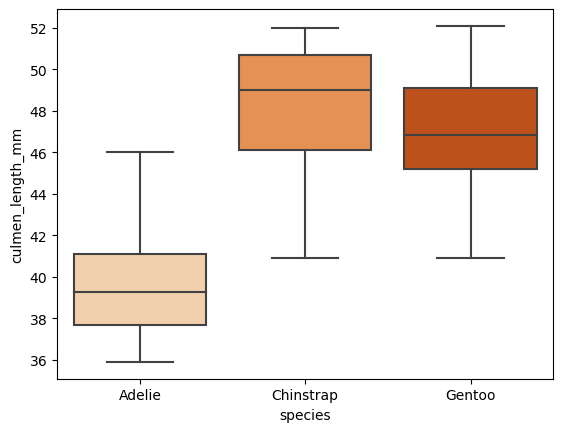

In [48]:
sb.boxplot(data=no_outliers,y="culmen_length_mm",x="species",orient="v", palette="Oranges")

After this operation, we have 305 samples in our dataset. With this approach we need to be extremely careful since it reduces the dataset size and highly depends on the data distribution.

# 4. Binning ( Discretization)

Binning is a simple technique that groups different values into bins. For example, when we want to bin numerical features that would look like something like this:

* 0-10 – Low
* 10-50 – Medium
* 50-100 – High

However, we can bin categorical values too. For example, we can bin countries by the continent it is on:

The problem with binning is that it can downgrade performance, but it can prevent overfitting and increase the robustness of the machine learning model. Here is what that looks like in the code:

In [49]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], 
                                       bins=[0, 40, 50, 100],
                                       labels=["Low", "Mid", "High"])
bin_data

C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\622678222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'],


,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Mid
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,43.92193,Mid
340,46.80000,Mid
341,50.40000,High
342,45.20000,Mid


# 5. Scaling

*  machine learning models make better predictions. Scaling is done for one simple reason, if features are not in the same range, they will be treated differently by the machine learning algorithm. 

*  if we have one feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value.  if we have one feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value. 

* That is why we use scaling, to put our numerical features into the same range. This standardization of data is a common requirement for many machine learning algorithms

In [50]:
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


### 5.1 Standard Scaling

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

    def scaler():
        res = operation_a
        return res





df.column.apply(scaler)

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  QuantileTransformer

In [52]:
standard_scaler = StandardScaler()


# standard_scaler.fit(scaled_data[['body_mass_g']])


scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())
scaled_data['body_mass_scaled']

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\2500282727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])


0     -0.563095
1     -0.500500
2     -1.189047
3      0.002457
4     -0.938666
         ...   
339    0.002457
340    0.813998
341    1.940711
342    1.252164
343    1.502545
Name: body_mass_scaled, Length: 343, dtype: float64

array([[<AxesSubplot:title={'center':'body_mass_g'}>,
        <AxesSubplot:title={'center':'body_mass_scaled'}>]], dtype=object)

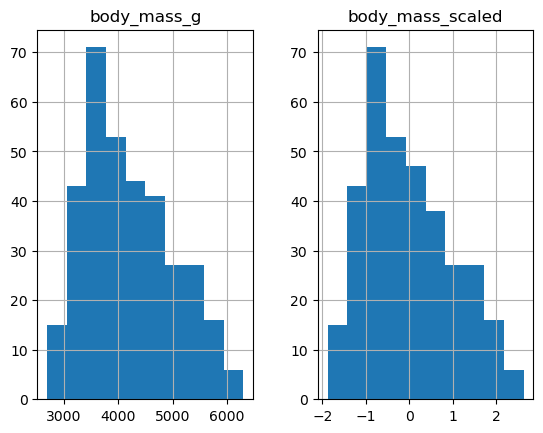

In [53]:
scaled_data.hist()


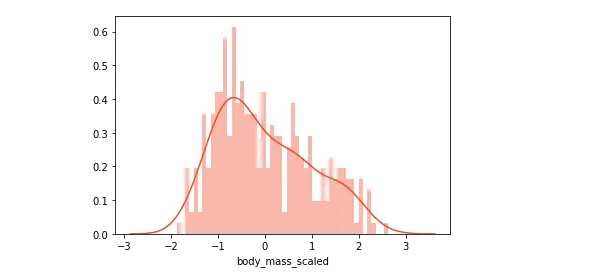

In [43]:
Image(filename="images/standard.png")

We can see that the original distribution of data is preserved. However, now data is in range -3 to 3.

### 5.2 Min-Max Scaling (Normalization)

The most popular scaling technique is normalization (also called min-max normalization and min-max scaling). It scales all data in the 0 to 1 range. This technique is defined by the formula:

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

In [54]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4166087696565679
Standard Deviation: 0.2222085746778217


C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\934457736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])


array([[<AxesSubplot:title={'center':'body_mass_g'}>,
        <AxesSubplot:title={'center':'body_mass_scaled'}>],
       [<AxesSubplot:title={'center':'body_mass_min_max_scaled'}>,
        <AxesSubplot:>]], dtype=object)

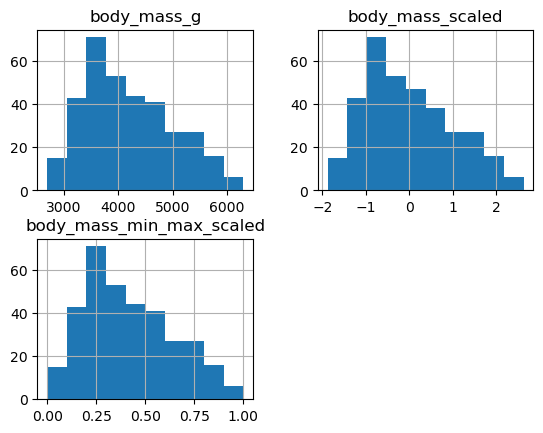

In [55]:
scaled_data.hist()

Distribution is perserved, but data is now in range from 0 to 1.

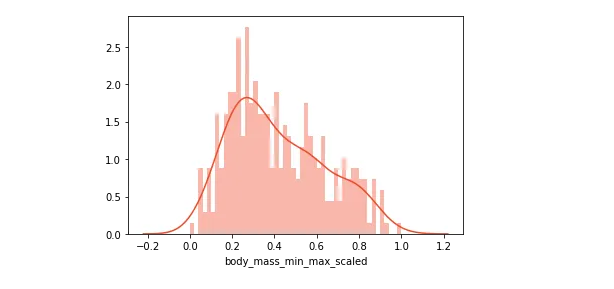

In [42]:
Image(filename="images/minmax.png")

### 5.3 Quantile Transformation

As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution

In [56]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.5003068896731625
Standard Deviation: 0.2899470129457298


C:\Users\JOY\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\3933579211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


array([[<AxesSubplot:title={'center':'body_mass_g'}>,
        <AxesSubplot:title={'center':'body_mass_scaled'}>],
       [<AxesSubplot:title={'center':'body_mass_min_max_scaled'}>,
        <AxesSubplot:title={'center':'body_mass_q_trans_uniform'}>]],
      dtype=object)

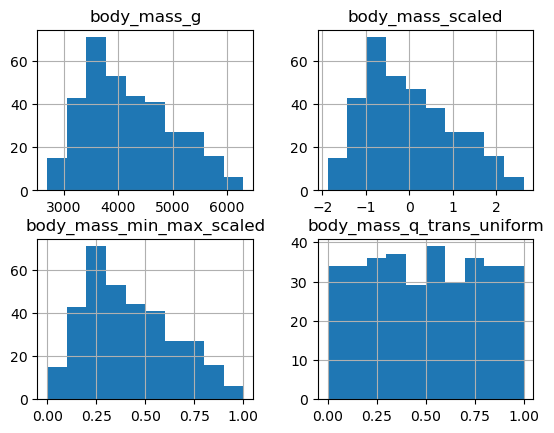

In [57]:
scaled_data.hist()

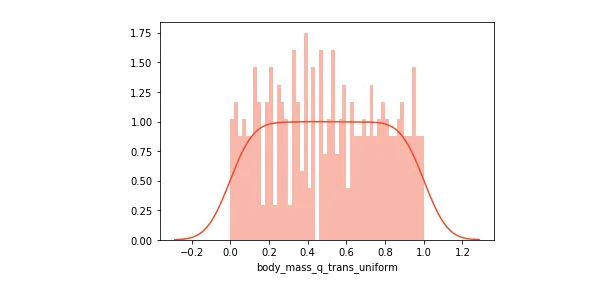

In [44]:
Image(filename="images/qa.png")

Here is the code that puts your data into normal distribution:

In [58]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

Mean: 0.0012074951683245076
Standard Deviation: 1.0603588849546568


C:\Users\JOY\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\1214033699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


array([[<AxesSubplot:title={'center':'body_mass_g'}>,
        <AxesSubplot:title={'center':'body_mass_scaled'}>],
       [<AxesSubplot:title={'center':'body_mass_min_max_scaled'}>,
        <AxesSubplot:title={'center':'body_mass_q_trans_uniform'}>],
       [<AxesSubplot:title={'center':'body_mass_q_trans_normal'}>,
        <AxesSubplot:>]], dtype=object)

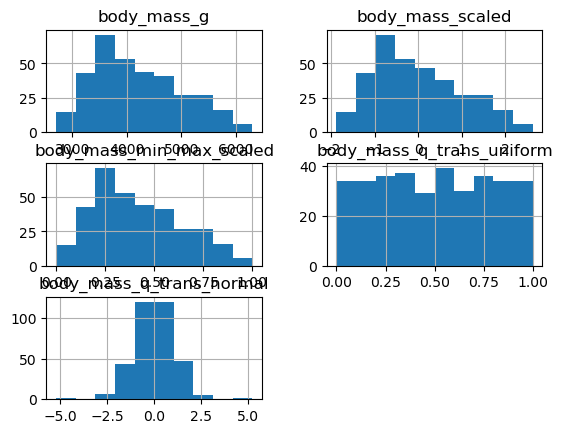

In [59]:
scaled_data.hist()

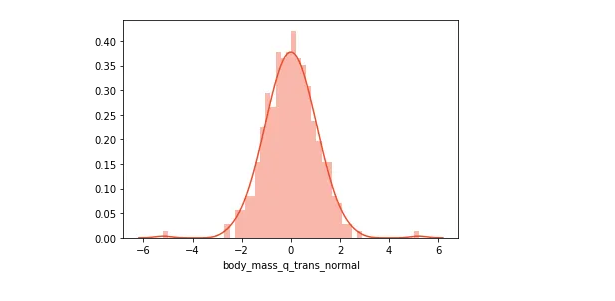

In [45]:
Image(filename="images/qb.png")

# 6. Log Transform 

* One of the most popular mathematical transformations of data is logarithm transformation. Essentially, we just apply the log function to the current values
*  It is important to note that data must be positive, so if you need a scale or normalize data beforehand. This transformation brings many benefits
*  One of them is that the distribution of the data becomes more normal. In turn, this helps us to handle skewed data and decreases the impact of the outliers. Here is what that looks like in the code:

In [60]:
log_data = data[['body_mass_g']]
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)
log_data

C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\1342311532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)


,body_mass_g,body_mass_log
0,3750.000000,8.229778
1,3800.000000,8.243019
2,3250.000000,8.086718
3,4201.754386,8.343495
4,3450.000000,8.146419
...,...,...
339,4201.754386,8.343495
340,4850.000000,8.486940
341,5750.000000,8.657129
342,5200.000000,8.556606


array([[<AxesSubplot:title={'center':'body_mass_g'}>,
        <AxesSubplot:title={'center':'body_mass_log'}>]], dtype=object)

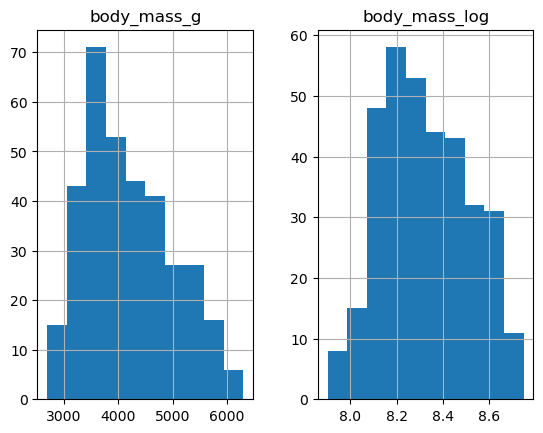

In [62]:
log_data.hist()

If we check the distribution of non-transformed data and transformed data we can see that transformed data is closer to the normal distribution:

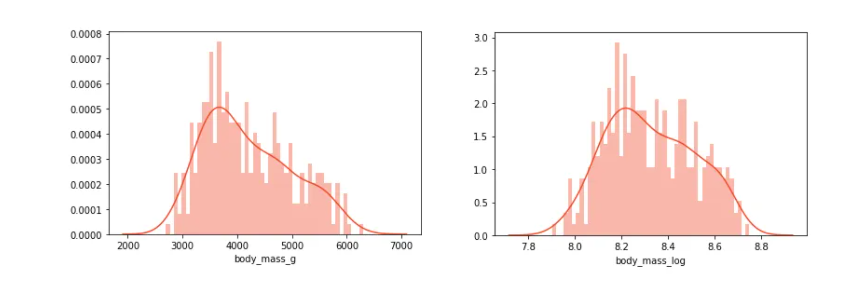

In [41]:
Image(filename="images/log.png")

Read more 
* https://heartbeat.fritz.ai/hands-on-with-feature-engineering-advanced-methods-in-python-for-machine-learning-e05bf12da06a
*https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering

# 7  Feature Selection

* Datasets that are coming from the client are often huge.
* We can have hundreds or even thousands of features
* A large number of features can lead to overfitting. 
* Apart from that, optimizing hyperparameters and training algorithms, in general, will take longer. That is why we want to pick the most relevant features from the beginning.

    ML formula
        y = f(X)

    ML - PREDICTING SOMETHING

    PREDICTING CHURN 

        y - CHURN

        X - others (reduce the number of these ones)

        f - model /algorithm



    TRAIN - TEACH 

        from sklearn import model
        %%time
        model.fit(X_train,y_train)

    TEST - EVALUATE

        y_predict = model.predict(X_test)

    y_predict vs y_test

    EVALUATION_METRICS
        accuracy = 100%
        error = 0

In [86]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


    y = species
    X = others

### 7.1 Univariate Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif

* There are several techniques when it comes to feature selection
* the simplest one (and the most often used) – Univariate Feature Selection. This method is based on univariate statistical tests. It calculates how strongly the output feature depends on each feature from the dataset using statistical tests (like χ2)

In [64]:
feature_sel_data = data.drop(['species'], axis=1)

feature_sel_data["island"] = feature_sel_data["island"].cat.codes
feature_sel_data["sex"] = feature_sel_data["sex"].cat.codes

# Use 3 features
selector = SelectKBest(f_classif, k=4)

selected_data = selector.fit_transform(feature_sel_data, data['species'])
selected_data


array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

* Using hyperparameter k we defined that we want to keep the 3 most influential features from the dataset.
* The output of this operation is NumPy array which contains selected features

In [65]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=data.index, 
                                 columns=feature_sel_data.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.7,181.000000,3750.000000
1,39.50000,17.4,186.000000,3800.000000
2,40.30000,18.0,195.000000,3250.000000
3,43.92193,17.3,200.915205,4201.754386
4,36.70000,19.3,193.000000,3450.000000


### 7.2. Filter Method:
* filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.
* plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV.
* we will only select features which has correlation of above 0.5

In [66]:
from sklearn.datasets import load_boston

In [67]:
x = load_boston()

C:\Users\JOY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [68]:
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\3698497009.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("MEDV",1)   #Feature Matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

In [69]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

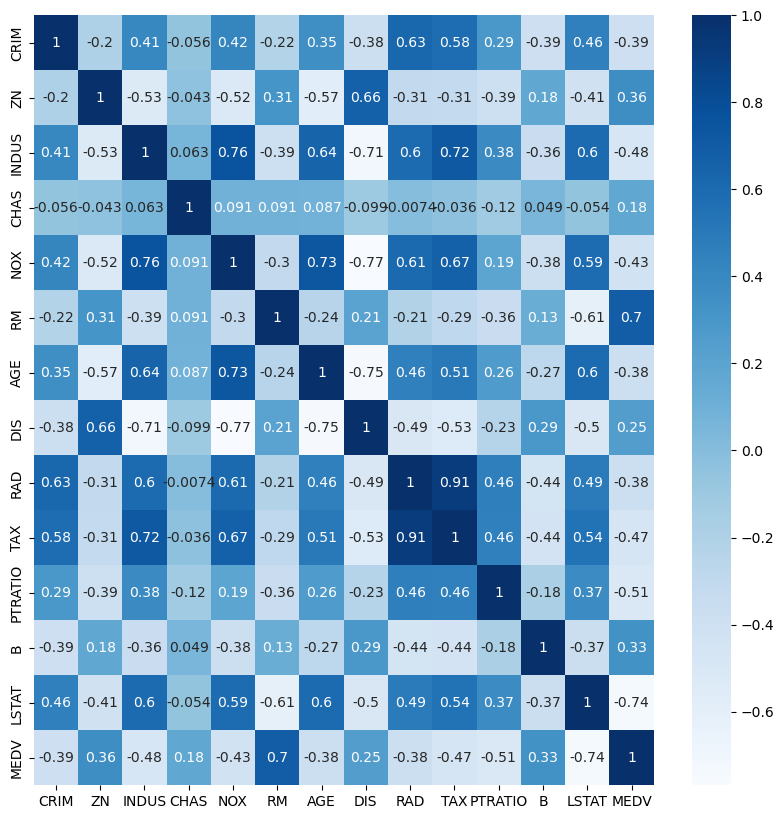

In [71]:
%matplotlib inline
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)

In [72]:
cor = df.corr()

In [73]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
cor_target 

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [74]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV

# 8. Feature Grouping & Aggregations

sometimes we have observations that are spread over several rows. The goal of the Feature Grouping is to connect these rows into a single one and then use those aggregated rows

In [75]:
grouped_data = data.groupby('species')

sums_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].sum().add_suffix('_sum')
avgs_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].mean().add_suffix('_mean')

sumed_averaged = pd.concat([sums_data, avgs_data], axis=1)
sumed_averaged

C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\3682604076.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sums_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].sum().add_suffix('_sum')
C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\3682604076.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgs_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].mean().add_suffix('_mean')


,culmen_length_mm_sum,culmen_depth_mm_sum,culmen_length_mm_mean,culmen_depth_mm_mean
species,,,,
Adelie,5901.42193,2787.6,38.825144,18.339474
Chinstrap,3320.70000,1252.6,48.833824,18.420588
Gentoo,5842.52193,1844.4,47.500178,14.995122


# 9 Train_test_split

In [76]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

len(test)


69

In [77]:
len(train)

274

# 10. Date-time

When you have date variables, you can extract many features to enrich your feature’s set—here are some examples of what we can extract:

* Day of the week (Thursday, Wednesday).
* Day of the month (16,02).
* Month (January, August), or numbers (1,8).
* Year (2020, 1997, 2009).
* Week of the year (2 would represent the second week of January).
* Season of the year (Summer, Winter).
* Quarter.
* Semester.
* Is the day a weekend (True for Saturday, False for Thursday)
* Public holiday or not.
* Leap year or not.
* Difference between two dates.
* The choice is yours—whatever will help your models, depending on the context of your project.

![](images/date.png)

In [79]:
data = pd.read_csv("data/datedata.csv")
data.head()
df=data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


To convert these strings into internal datetimes, we can use the pandas function to_datetime

In [81]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], format = "%Y-%m-%dT%H:%M:%SZ",errors ="coerce")


In [82]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], format = "%Y-%m-%dT%H:%M:%SZ",errors ="coerce")

In [83]:
df["ScheduledDay_year"] = df["ScheduledDay"].dt.year
df["ScheduledDay_month"] =df["ScheduledDay"].dt.month
df["ScheduledDay_week"] =df["ScheduledDay"].dt.week
df["ScheduledDay_day"] = df["ScheduledDay"].dt.day
df["ScheduledDay_hour"] = df["ScheduledDay"].dt.hour
df["ScheduledDay_minute"] = df["ScheduledDay"].dt.minute
df["ScheduledDay_dayofweek"] = df["ScheduledDay"].dt.dayofweek


C:\Users\JOY\AppData\Local\Temp\ipykernel_1356\995972271.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["ScheduledDay_week"] =df["ScheduledDay"].dt.week


In [84]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,2016,4,17,29,18,38,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,2016,4,17,29,16,8,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,No,2016,4,17,29,16,19,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,2016,4,17,29,17,29,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,No,2016,4,17,29,16,7,4
